In [2]:
from model import pd, np
from io import StringIO
import datetime
from dateutil.relativedelta import relativedelta

raw = pd.DataFrame()
with open('3.listens') as data:
    # display(data)
    # txtList = data.read()
    # print(txtList.splitlines())
    # # print("lines")
    # # print(txtList)
    # for line in range(0,len(list(txtList)),5000):
    #     # display(str(data)[i:i+5000])
    #     # print('in loop')
    #     # print(txtList[line:line+5000])
    raw = pd.read_json(data,lines=True)
        # pd.concat([raw,part])
# print(data.closed())
raw['timestamp'] = pd.to_datetime(raw['timestamp'], unit='s')


In [3]:
# print(raw.describe())
display(raw)
print(raw.describe())

,user_id,user_name,timestamp,track_metadata,recording_msid
0,18509,mmmasprammm,2024-03-19 23:59:36,"{'track_name': 'Malediction', 'artist_name': '...",275d578f-5fb5-45f6-9e78-3ed07b2b440b
1,16281,novaphoenix,2024-03-19 23:58:38,"{'track_name': 'ロマンサー', 'artist_name': 'kiyosu...",9f0a6348-0711-4623-bfed-863f7aa5550a
2,16281,novaphoenix,2024-03-19 23:56:47,"{'track_name': 'NATIONHATER', 'artist_name': '...",bbca3705-26f2-4770-9cff-4d215b830e36
3,16281,novaphoenix,2024-03-19 23:54:16,"{'track_name': 'Minesweeper', 'artist_name': '...",1b7c1a38-d15c-455d-8d06-9154decb715f
4,3397,baysappr,2024-03-20 00:00:07,{'track_name': 'Calling out Your Name (feat. M...,9dd7e6b5-d74e-4f13-9c47-b481d3d7fa16
...,...,...,...,...,...
655843,30073,tytyayay,2024-03-20 23:59:57,"{'track_name': 'Softcore', 'artist_name': 'The...",d97e922b-bd88-48f2-b340-be71a4a6f556
655844,11731,Franklin_ebr,2024-03-20 23:59:58,"{'track_name': '射手座☆午後九時Don't be late', 'artis...",193e2740-000a-4494-9f89-c545386fbaf6
655845,22617,growbee,2024-03-21 00:00:02,"{'track_name': 'Listen To The Lion', 'artist_n...",05d39bfa-dc2b-429b-89bb-5461b14cb6fa
655846,19654,Kereshimei123,2024-03-20 23:59:32,"{'track_name': '雨男 (Ame Otoko)', 'artist_name'...",b1c54fcb-46ca-4adf-b8b1-5f60cb3951d3


             user_id                      timestamp
count  655848.000000                         655848
mean    25656.318966  2019-05-29 12:26:48.659008512
min         1.000000            2005-02-13 12:28:38
25%     21674.000000     2015-05-04 06:17:42.500000
50%     29426.000000     2021-07-04 11:11:05.500000
75%     30421.000000            2024-03-20 01:37:54
max     30430.000000            2024-03-21 00:00:02
std      6755.286611                            NaN


In [4]:
from datetime import datetime
def filterDataByUsername(df:pd.DataFrame, username:str) -> pd.DataFrame:
    return df[df['user_name'] == username]


def filterDataByDate(df:pd.DataFrame, date_begin:datetime.date, date_end:datetime.date) -> pd.DataFrame:
    # date format : YYYY-MM-DD
    return df[(df['timestamp'] >= date_begin) & (df['timestamp'] <= date_end)]

user_id           0
user_name         0
timestamp         0
track_metadata    0
recording_msid    0
dtype: int64


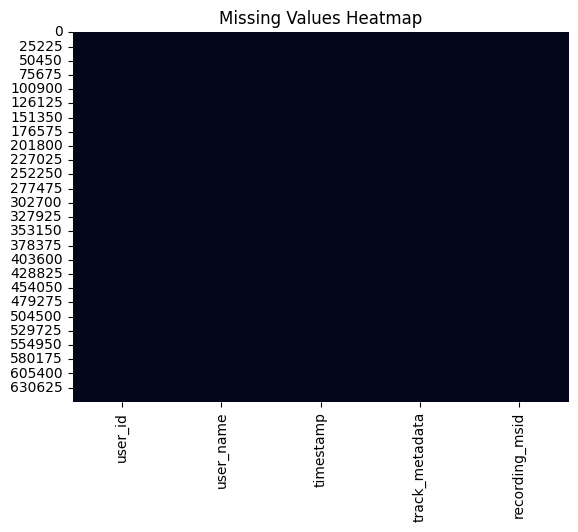

In [5]:
print(raw.isnull().sum())

import matplotlib.pyplot as plt
import seaborn as sb
# no null values
# lets remove the ones that are null

sb.heatmap(raw.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# print(raw['user_name'].sum())
print(raw['user_name'].value_counts())
# print(raw['track_metadata'].value_counts())


user_name
lamex1234          127486
pawal              112955
mandeed12           93520
Stranger1188        64952
okiseme             32854
                    ...  
labou                   1
novchar                 1
AdithyaNair1234         1
ashabazian              1
The_Paya                1
Name: count, Length: 4162, dtype: int64


In [7]:
import json

from io import StringIO
tracksdf = raw['track_metadata']
display(tracksdf)

# tracksdf.drop_duplicates()

# display(tracksdf)



0         {'track_name': 'Malediction', 'artist_name': '...
1         {'track_name': 'ロマンサー', 'artist_name': 'kiyosu...
2         {'track_name': 'NATIONHATER', 'artist_name': '...
3         {'track_name': 'Minesweeper', 'artist_name': '...
4         {'track_name': 'Calling out Your Name (feat. M...
                                ...                        
655843    {'track_name': 'Softcore', 'artist_name': 'The...
655844    {'track_name': '射手座☆午後九時Don't be late', 'artis...
655845    {'track_name': 'Listen To The Lion', 'artist_n...
655846    {'track_name': '雨男 (Ame Otoko)', 'artist_name'...
655847    {'track_name': 'Choppa Won't Miss (feat. Young...
Name: track_metadata, Length: 655848, dtype: object

In [8]:
# def getTrackData(rawData : pd.DataFrame) -> pd.DataFrame: # should take about 2.8 minutes for 100000 songs
#     i = 0
#     track_metadata = ""
#     while(i < 15000):
#         tracksdf = rawData[i:i+5000]
#         for track in tracksdf:
#             track_metadata = ",".join([track_metadata, str(track)])
#             i+=1
#     track_metadata = track_metadata[1:]

#     meta = eval(track_metadata)
#     tracks = pd.read_json(StringIO(json.dumps(meta)))

#     return tracks

#optimized
def getTracks(rawData : pd.DataFrame, index : int) -> str:# should take about 2.8 minutes for 100000 songs
    track_metadata = ""
    tracksdf = rawData[index:index+1000]

    for track in tracksdf:
        track_metadata = ",".join([track_metadata, str(track)])
        index+=1

    return track_metadata

def getTrackData(tracksdf,max):
    index = 0
    track_metadata = ""
    while(index<max):
        track_metadata = "".join([track_metadata, getTracks(tracksdf, index)])
        index+=1000
    track_metadata = track_metadata[1:]

    meta = eval(track_metadata)
    return pd.read_json(StringIO(json.dumps(meta)))

    # display(tracks)

today = datetime.now()
three_months_ago = today + relativedelta(months=-3)

all_last_3_months = filterDataByDate(raw, three_months_ago, today)

print(len(all_last_3_months))
tracks = getTrackData(all_last_3_months['track_metadata'],len(all_last_3_months))

print(tracks.keys())
display(tracks)



183104
Index(['track_name', 'artist_name', 'release_name', 'additional_info',
       'mbid_mapping', 'brainzplayer_metadata', 'track_mbid',
       'addtional_info'],
      dtype='object')


,track_name,artist_name,release_name,additional_info,mbid_mapping,brainzplayer_metadata,track_mbid,addtional_info
0,Malediction,Current 93,Swastikas for Goddy,"{'submission_client': 'Pano Scrobbler', 'submi...",NaN,NaN,NaN,NaN
1,ロマンサー,kiyosumi,is it just a delusion,"{'isrc': 'QZK6K2344356', 'discnumber': 1, 'ori...",NaN,NaN,NaN,NaN
2,NATIONHATER,BUGCORE,NATIONHATER,"{'isrc': 'QZMER2305850', 'discnumber': 1, 'ori...",NaN,NaN,NaN,NaN
3,Minesweeper,AQUASINE,Minesweeper,"{'isrc': 'QZES72328739', 'discnumber': 1, 'ori...",NaN,NaN,NaN,NaN
4,Calling out Your Name (feat. Mikhaela Faye) [R...,Shimza,Calling out Your Name (feat. Mikhaela Faye) - EP,{'recording_msid': '9dd7e6b5-d74e-4f13-9c47-b4...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
183099,Softcore,The Neighbourhood,Bravo Hits 116,{'recording_msid': 'd97e922b-bd88-48f2-b340-be...,NaN,NaN,NaN,NaN
183100,射手座☆午後九時Don't be late,シェリル・ノーム,ダイアモンド クレバス / 射手座☆午後九時Don't be late,"{'date': '2008-05-08', 'isrc': 'JPG750700340',...",NaN,NaN,NaN,NaN
183101,Listen To The Lion,Van Morrison,Saint Dominic's Preview,"{'listening_from': 'Plex', 'recording_msid': '...",NaN,NaN,NaN,NaN
183102,雨男 (Ame Otoko),キズ,雨男 (Ame Otoko),"{'duration_ms': 273000, 'submission_client': '...",NaN,NaN,NaN,NaN


In [9]:
print(tracks.keys())
display(tracks)

Index(['track_name', 'artist_name', 'release_name', 'additional_info',
       'mbid_mapping', 'brainzplayer_metadata', 'track_mbid',
       'addtional_info'],
      dtype='object')


,track_name,artist_name,release_name,additional_info,mbid_mapping,brainzplayer_metadata,track_mbid,addtional_info
0,Malediction,Current 93,Swastikas for Goddy,"{'submission_client': 'Pano Scrobbler', 'submi...",NaN,NaN,NaN,NaN
1,ロマンサー,kiyosumi,is it just a delusion,"{'isrc': 'QZK6K2344356', 'discnumber': 1, 'ori...",NaN,NaN,NaN,NaN
2,NATIONHATER,BUGCORE,NATIONHATER,"{'isrc': 'QZMER2305850', 'discnumber': 1, 'ori...",NaN,NaN,NaN,NaN
3,Minesweeper,AQUASINE,Minesweeper,"{'isrc': 'QZES72328739', 'discnumber': 1, 'ori...",NaN,NaN,NaN,NaN
4,Calling out Your Name (feat. Mikhaela Faye) [R...,Shimza,Calling out Your Name (feat. Mikhaela Faye) - EP,{'recording_msid': '9dd7e6b5-d74e-4f13-9c47-b4...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
183099,Softcore,The Neighbourhood,Bravo Hits 116,{'recording_msid': 'd97e922b-bd88-48f2-b340-be...,NaN,NaN,NaN,NaN
183100,射手座☆午後九時Don't be late,シェリル・ノーム,ダイアモンド クレバス / 射手座☆午後九時Don't be late,"{'date': '2008-05-08', 'isrc': 'JPG750700340',...",NaN,NaN,NaN,NaN
183101,Listen To The Lion,Van Morrison,Saint Dominic's Preview,"{'listening_from': 'Plex', 'recording_msid': '...",NaN,NaN,NaN,NaN
183102,雨男 (Ame Otoko),キズ,雨男 (Ame Otoko),"{'duration_ms': 273000, 'submission_client': '...",NaN,NaN,NaN,NaN


In [10]:
display(all_last_3_months)

# 15000 trackcs

,user_id,user_name,timestamp,track_metadata,recording_msid
0,18509,mmmasprammm,2024-03-19 23:59:36,"{'track_name': 'Malediction', 'artist_name': '...",275d578f-5fb5-45f6-9e78-3ed07b2b440b
1,16281,novaphoenix,2024-03-19 23:58:38,"{'track_name': 'ロマンサー', 'artist_name': 'kiyosu...",9f0a6348-0711-4623-bfed-863f7aa5550a
2,16281,novaphoenix,2024-03-19 23:56:47,"{'track_name': 'NATIONHATER', 'artist_name': '...",bbca3705-26f2-4770-9cff-4d215b830e36
3,16281,novaphoenix,2024-03-19 23:54:16,"{'track_name': 'Minesweeper', 'artist_name': '...",1b7c1a38-d15c-455d-8d06-9154decb715f
4,3397,baysappr,2024-03-20 00:00:07,{'track_name': 'Calling out Your Name (feat. M...,9dd7e6b5-d74e-4f13-9c47-b481d3d7fa16
...,...,...,...,...,...
655843,30073,tytyayay,2024-03-20 23:59:57,"{'track_name': 'Softcore', 'artist_name': 'The...",d97e922b-bd88-48f2-b340-be71a4a6f556
655844,11731,Franklin_ebr,2024-03-20 23:59:58,"{'track_name': '射手座☆午後九時Don't be late', 'artis...",193e2740-000a-4494-9f89-c545386fbaf6
655845,22617,growbee,2024-03-21 00:00:02,"{'track_name': 'Listen To The Lion', 'artist_n...",05d39bfa-dc2b-429b-89bb-5461b14cb6fa
655846,19654,Kereshimei123,2024-03-20 23:59:32,"{'track_name': '雨男 (Ame Otoko)', 'artist_name'...",b1c54fcb-46ca-4adf-b8b1-5f60cb3951d3


In [11]:
def getAdditional(rawData : pd.DataFrame, index : int) -> pd.DataFrame: # should take about 2.8 minutes for 100000 song
    additional_metadata = ""
    lessData = rawData[index:index+1000]
    for row in lessData:
        additional_metadata = ",".join([additional_metadata, str(row)])
        index+=1
    # additional_metadata = additional_metadata[1:]

    # meta = eval(additional_metadata)
    # additional_info = pd.read_json(StringIO(json.dumps(meta)))

    return additional_metadata

def getAdditionalData(additional_data, max):
    index = 0
    additional_metadata = ""
    while(index<max):
        additional_metadata = "".join([additional_metadata, getAdditional(additional_data, index)])
        index+=1000
    additional_metadata = additional_metadata[1:]

    meta = eval(additional_metadata)
    return pd.read_json(StringIO(json.dumps(meta)))


# def getTrackData(tracksdf,max):
#     index = 0
#     track_metadata = ""
#     while(index<max):
#         track_metadata = "".join([track_metadata, getTracks(tracksdf, index)])
#         index+=1000
#     track_metadata = track_metadata[1:]

#     meta = eval(track_metadata)
#     return pd.read_json(StringIO(json.dumps(meta)))

# tracks = getTrackData(tracksdf,100000)


# addditonal = getAdditionalData(100000)

additional_inforaw = tracks['additional_info']
additional = getAdditionalData(additional_inforaw, len(tracks))
display(additional)

,submission_client,submission_client_version,recording_msid,isrc,discnumber,origin_url,spotify_id,duration_ms,tracknumber,artist_names,...,track_length,track_number,work_mbids,tags,lastfm_track_mbid,lastfm_artist_mbid,lastfm_release_mbid,choosen_by_user,genre,comment
0,Pano Scrobbler,"3.16 - 2023, Dec 18",275d578f-5fb5-45f6-9e78-3ed07b2b440b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,listenbrainz,NaN,9f0a6348-0711-4623-bfed-863f7aa5550a,QZK6K2344356,1,https://open.spotify.com/track/4SBQUgbws4p65VK...,https://open.spotify.com/track/4SBQUgbws4p65VK...,109629.0,3,[kiyosumi],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,listenbrainz,NaN,bbca3705-26f2-4770-9cff-4d215b830e36,QZMER2305850,1,https://open.spotify.com/track/1jQNASZaZTzKsHD...,https://open.spotify.com/track/1jQNASZaZTzKsHD...,145777.0,1,[BUGCORE],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,listenbrainz,NaN,1b7c1a38-d15c-455d-8d06-9154decb715f,QZES72328739,1,https://open.spotify.com/track/2YmkoXHr6Spdc1F...,https://open.spotify.com/track/2YmkoXHr6Spdc1F...,170362.0,1,[AQUASINE],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,9dd7e6b5-d74e-4f13-9c47-b481d3d7fa16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183099,NaN,NaN,d97e922b-bd88-48f2-b340-be71a4a6f556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183100,foobar2000,1.3.2,193e2740-000a-4494-9f89-c545386fbaf6,JPG750700340,1,NaN,NaN,NaN,2,NaN,...,NaN,NaN,[16089cbd-3710-4d90-a8e0-d2bf45c237e6],NaN,NaN,NaN,NaN,NaN,NaN,NaN
183101,NaN,NaN,05d39bfa-dc2b-429b-89bb-5461b14cb6fa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183102,Pano Scrobbler,"3.20 - 2024, Feb 22",b1c54fcb-46ca-4adf-b8b1-5f60cb3951d3,NaN,NaN,NaN,NaN,273000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(all_last_3_months.keys())

Index(['user_id', 'user_name', 'timestamp', 'track_metadata',
       'recording_msid'],
      dtype='object')


In [13]:
# drop additional from tracks
all_last_3_months.reset_index(inplace=True)
# tracks.res('user_id', inplace=True)
display(all_last_3_months)

cleaned_data:pd.DataFrame = None

if 'additional_info' in tracks.keys():
    tracks.drop(columns=['additional_info'], inplace=True)

display(tracks)

all_last_3_months = all_last_3_months.drop(columns='track_metadata').join(tracks, how='left')

display(all_last_3_months)


,index,user_id,user_name,timestamp,track_metadata,recording_msid
0,0,18509,mmmasprammm,2024-03-19 23:59:36,"{'track_name': 'Malediction', 'artist_name': '...",275d578f-5fb5-45f6-9e78-3ed07b2b440b
1,1,16281,novaphoenix,2024-03-19 23:58:38,"{'track_name': 'ロマンサー', 'artist_name': 'kiyosu...",9f0a6348-0711-4623-bfed-863f7aa5550a
2,2,16281,novaphoenix,2024-03-19 23:56:47,"{'track_name': 'NATIONHATER', 'artist_name': '...",bbca3705-26f2-4770-9cff-4d215b830e36
3,3,16281,novaphoenix,2024-03-19 23:54:16,"{'track_name': 'Minesweeper', 'artist_name': '...",1b7c1a38-d15c-455d-8d06-9154decb715f
4,4,3397,baysappr,2024-03-20 00:00:07,{'track_name': 'Calling out Your Name (feat. M...,9dd7e6b5-d74e-4f13-9c47-b481d3d7fa16
...,...,...,...,...,...,...
183099,655843,30073,tytyayay,2024-03-20 23:59:57,"{'track_name': 'Softcore', 'artist_name': 'The...",d97e922b-bd88-48f2-b340-be71a4a6f556
183100,655844,11731,Franklin_ebr,2024-03-20 23:59:58,"{'track_name': '射手座☆午後九時Don't be late', 'artis...",193e2740-000a-4494-9f89-c545386fbaf6
183101,655845,22617,growbee,2024-03-21 00:00:02,"{'track_name': 'Listen To The Lion', 'artist_n...",05d39bfa-dc2b-429b-89bb-5461b14cb6fa
183102,655846,19654,Kereshimei123,2024-03-20 23:59:32,"{'track_name': '雨男 (Ame Otoko)', 'artist_name'...",b1c54fcb-46ca-4adf-b8b1-5f60cb3951d3


,track_name,artist_name,release_name,mbid_mapping,brainzplayer_metadata,track_mbid,addtional_info
0,Malediction,Current 93,Swastikas for Goddy,NaN,NaN,NaN,NaN
1,ロマンサー,kiyosumi,is it just a delusion,NaN,NaN,NaN,NaN
2,NATIONHATER,BUGCORE,NATIONHATER,NaN,NaN,NaN,NaN
3,Minesweeper,AQUASINE,Minesweeper,NaN,NaN,NaN,NaN
4,Calling out Your Name (feat. Mikhaela Faye) [R...,Shimza,Calling out Your Name (feat. Mikhaela Faye) - EP,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
183099,Softcore,The Neighbourhood,Bravo Hits 116,NaN,NaN,NaN,NaN
183100,射手座☆午後九時Don't be late,シェリル・ノーム,ダイアモンド クレバス / 射手座☆午後九時Don't be late,NaN,NaN,NaN,NaN
183101,Listen To The Lion,Van Morrison,Saint Dominic's Preview,NaN,NaN,NaN,NaN
183102,雨男 (Ame Otoko),キズ,雨男 (Ame Otoko),NaN,NaN,NaN,NaN


,index,user_id,user_name,timestamp,recording_msid,track_name,artist_name,release_name,mbid_mapping,brainzplayer_metadata,track_mbid,addtional_info
0,0,18509,mmmasprammm,2024-03-19 23:59:36,275d578f-5fb5-45f6-9e78-3ed07b2b440b,Malediction,Current 93,Swastikas for Goddy,NaN,NaN,NaN,NaN
1,1,16281,novaphoenix,2024-03-19 23:58:38,9f0a6348-0711-4623-bfed-863f7aa5550a,ロマンサー,kiyosumi,is it just a delusion,NaN,NaN,NaN,NaN
2,2,16281,novaphoenix,2024-03-19 23:56:47,bbca3705-26f2-4770-9cff-4d215b830e36,NATIONHATER,BUGCORE,NATIONHATER,NaN,NaN,NaN,NaN
3,3,16281,novaphoenix,2024-03-19 23:54:16,1b7c1a38-d15c-455d-8d06-9154decb715f,Minesweeper,AQUASINE,Minesweeper,NaN,NaN,NaN,NaN
4,4,3397,baysappr,2024-03-20 00:00:07,9dd7e6b5-d74e-4f13-9c47-b481d3d7fa16,Calling out Your Name (feat. Mikhaela Faye) [R...,Shimza,Calling out Your Name (feat. Mikhaela Faye) - EP,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
183099,655843,30073,tytyayay,2024-03-20 23:59:57,d97e922b-bd88-48f2-b340-be71a4a6f556,Softcore,The Neighbourhood,Bravo Hits 116,NaN,NaN,NaN,NaN
183100,655844,11731,Franklin_ebr,2024-03-20 23:59:58,193e2740-000a-4494-9f89-c545386fbaf6,射手座☆午後九時Don't be late,シェリル・ノーム,ダイアモンド クレバス / 射手座☆午後九時Don't be late,NaN,NaN,NaN,NaN
183101,655845,22617,growbee,2024-03-21 00:00:02,05d39bfa-dc2b-429b-89bb-5461b14cb6fa,Listen To The Lion,Van Morrison,Saint Dominic's Preview,NaN,NaN,NaN,NaN
183102,655846,19654,Kereshimei123,2024-03-20 23:59:32,b1c54fcb-46ca-4adf-b8b1-5f60cb3951d3,雨男 (Ame Otoko),キズ,雨男 (Ame Otoko),NaN,NaN,NaN,NaN


In [14]:
# display(additional.transpose().isnull())

additional_nulls = additional.isnull()
# print(additional_nulls.keys())
print("(Percentage of data available by column)\n\t-------------------------")
for key in additional_nulls.keys():
    # true = 100*(additional_nulls[key].value_counts().loc[additional_nul                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ls[key].value_counts().keys == 'True']/ len(additional_nulls))
    false = 100*(additional_nulls[key].value_counts().loc[False]/ len(additional_nulls))
    # print(additional_nulls[key].value_counts())
    # print(key + " : {:.2f} %".format(true))
    print(key + " : {:.2f} %".format(false) )

# print(additional_nulls['duration_ms'].value_counts().iloc[0] / len(additional_nulls))

# sb.heatmap(additional.transpose().isnull())


# print(f'keys {additional_nulls[key].value_counts().keys()}')
# print(additional_nulls[key].value_counts())
# print(additional_nulls[key].value_counts().loc[True])


# plt.title('Nulls of Additional Info')
# plt.show()

(Percentage of data available by column)
	-------------------------
submission_client : 85.30 %
submission_client_version : 36.41 %
recording_msid : 100.00 %
isrc : 43.20 %
discnumber : 44.03 %
origin_url : 49.61 %
spotify_id : 42.62 %
duration_ms : 68.71 %
tracknumber : 58.50 %
artist_names : 41.87 %
music_service : 42.30 %
spotify_album_id : 41.87 %
spotify_artist_ids : 41.87 %
release_artist_name : 41.99 %
release_artist_names : 41.88 %
spotify_album_artist_ids : 41.87 %
artist_mbids : 12.44 %
release_mbid : 9.56 %
recording_mbid : 9.31 %
duration : 10.13 %
music_service_name : 7.69 %
media_player : 11.02 %
listening_from : 4.30 %
date : 3.13 %
totaldiscs : 1.53 %
track_mbid : 4.12 %
albumartist : 2.45 %
totaltracks : 2.05 %
release_group_mbid : 2.48 %
media_player_version : 5.69 %
artist_mbid : 0.45 %
trackNumber : 1.05 %
rating : 1.08 %
source : 1.10 %
track_length : 1.27 %
track_number : 1.55 %
work_mbids : 0.50 %
tags : 1.77 %
lastfm_track_mbid : 2.41 %
lastfm_artist_mbid : 2.85

In [15]:
import random
index = random.randint(0,len(raw))

username = raw.loc[index, 'user_name'] # random user from data
print(username)

raw_filtered_by_user = filterDataByUsername(raw, username)
display(raw_filtered_by_user)

#get the users tracks listened to
userTracks = getTrackData(raw_filtered_by_user['track_metadata'], len(raw_filtered_by_user['track_metadata']))
display(userTracks)



pawal


,user_id,user_name,timestamp,track_metadata,recording_msid
347666,30425,pawal,2005-02-13 12:28:38,{'track_name': 'Cello Suite No. 5 in C Minor -...,8fd82b76-7039-4f9c-9158-41be586cad17
347667,30425,pawal,2005-02-13 12:28:38,{'track_name': 'Cello Suite No. 5 in C Minor -...,fde7b1b9-4d09-4ac2-9ac2-4a35b83a35d0
347668,30425,pawal,2005-02-13 12:28:38,{'track_name': 'Cello Suite No. 6 in D Major -...,23022a8f-c0a3-4251-ad51-133a93981f69
347669,30425,pawal,2005-02-13 12:28:38,{'track_name': 'Cello Suite No. 6 in D Major -...,3ec5cd69-f269-421e-93c7-493eb6df921a
347670,30425,pawal,2005-02-13 12:28:38,{'track_name': 'Cello Suite No. 6 in D Major -...,ad07f3fb-cc5b-4a2a-9055-7d05e55c488d
...,...,...,...,...,...
498579,30425,pawal,2024-03-20 17:15:12,{'track_name': 'Crowded places (feat. Akale Ho...,1b614d97-7f8e-4108-9d4f-f18f51e9fec1
500083,30425,pawal,2024-03-20 17:20:23,{'track_name': 'Warm my soul (feat. Courtney J...,3397b709-2a35-48fb-945b-27f162968e60
500464,30425,pawal,2024-03-20 17:24:27,{'track_name': 'Treat me like that (feat. Cour...,bbefd8e2-f56e-4c65-8b0f-cd96bdd36fdb
500838,30425,pawal,2024-03-20 17:28:15,"{'track_name': 'Body Hot', 'artist_name': 'Roo...",2731c057-ab31-46ac-9d93-3a19f026aa9c


,track_name,artist_name,additional_info,release_name
0,Cello Suite No. 5 in C Minor - Sarabande,Yo-Yo Ma,{'submission_client': 'ListenBrainz lastfm imp...,NaN
1,Cello Suite No. 5 in C Minor - Gigue,Yo-Yo Ma,{'submission_client': 'ListenBrainz lastfm imp...,NaN
2,Cello Suite No. 6 in D Major - Prelude,Yo-Yo Ma,{'submission_client': 'ListenBrainz lastfm imp...,NaN
3,Cello Suite No. 6 in D Major - Courante,Yo-Yo Ma,{'submission_client': 'ListenBrainz lastfm imp...,NaN
4,Cello Suite No. 6 in D Major - Sarabande,Yo-Yo Ma,{'submission_client': 'ListenBrainz lastfm imp...,NaN
...,...,...,...,...
112950,Crowded places (feat. Akale Horns),Blundetto,"{'duration_ms': 311250, 'tracknumber': 4, 'art...",warm my soul
112951,Warm my soul (feat. Courtney John),Blundetto,"{'duration_ms': 243230, 'tracknumber': 5, 'art...",warm my soul
112952,Treat me like that (feat. Courtney John),Blundetto,"{'duration_ms': 185210, 'tracknumber': 8, 'art...",warm my soul
112953,Body Hot,Roots Manuva,"{'duration_ms': 208640, 'tracknumber': 3, 'art...",Switching Sides


In [16]:



print(type(today))
print(type(three_months_ago))
filtered_by_user_last_3_months = filterDataByDate(raw_filtered_by_user, three_months_ago, today)


<class 'datetime.datetime'>
<class 'datetime.datetime'>


In [17]:
display(filtered_by_user_last_3_months)
display(filtered_by_user_last_3_months['timestamp'].describe())

,user_id,user_name,timestamp,track_metadata,recording_msid
475156,30425,pawal,2024-02-11 17:03:06,"{'track_name': 'Everything I Am Is Yours', 'ar...",829073b9-330f-454f-8e0b-29e1aab58b2b
475157,30425,pawal,2024-02-11 16:51:41,"{'track_name': 'High by the Beach', 'artist_na...",436d5136-204c-4820-9adb-d7cce6d8cb9e
475158,30425,pawal,2024-02-11 16:47:23,"{'track_name': 'You Got Me', 'artist_name': 'T...",2efe5e8e-f84e-4dcd-b3b6-6f4e8d9a6ab3
475159,30425,pawal,2024-02-11 16:47:23,"{'track_name': 'High by the Beach', 'artist_na...",436d5136-204c-4820-9adb-d7cce6d8cb9e
475160,30425,pawal,2024-02-11 16:43:03,"{'track_name': 'You Got Me', 'artist_name': 'T...",2efe5e8e-f84e-4dcd-b3b6-6f4e8d9a6ab3
...,...,...,...,...,...
498579,30425,pawal,2024-03-20 17:15:12,{'track_name': 'Crowded places (feat. Akale Ho...,1b614d97-7f8e-4108-9d4f-f18f51e9fec1
500083,30425,pawal,2024-03-20 17:20:23,{'track_name': 'Warm my soul (feat. Courtney J...,3397b709-2a35-48fb-945b-27f162968e60
500464,30425,pawal,2024-03-20 17:24:27,{'track_name': 'Treat me like that (feat. Cour...,bbefd8e2-f56e-4c65-8b0f-cd96bdd36fdb
500838,30425,pawal,2024-03-20 17:28:15,"{'track_name': 'Body Hot', 'artist_name': 'Roo...",2731c057-ab31-46ac-9d93-3a19f026aa9c


count                              361
mean     2024-03-03 18:12:04.326869760
min                2024-02-09 10:53:09
25%                2024-02-15 10:17:59
50%                2024-03-09 11:11:59
75%                2024-03-17 16:43:52
max                2024-03-20 17:31:58
Name: timestamp, dtype: object

In [18]:
userTracks = getTrackData(filtered_by_user_last_3_months['track_metadata'], len(filtered_by_user_last_3_months))

print(print("\tValues\n\t-------------"))
print(userTracks['track_name'].unique())
print("\tValue Counts\n\t-------------")
print(userTracks['track_name'].value_counts()[userTracks['track_name'].unique()])
print(userTracks['track_name'].unique())



inOrderCounts = userTracks['track_name'].value_counts()[userTracks['track_name'].unique()]
userUniques = userTracks['track_name'].unique()



	Values
	-------------
None
['Everything I Am Is Yours' 'High by the Beach' 'You Got Me' 'Radio'
 'Rain' 'Time Is On My Side'
 'Everybody\'s Talkin\' - From "Midnight Cowboy"'
 'Hold Me Oh My Darling - Stereo Version' 'Everybody'
 'Sorry About the Carpet - Edit' 'Out of Space' 'Work It'
 "Doin' Our Own Dang" 'The Streets - Re-Twist' 'Let My People Go'
 'Compton' 'Doves in the Wind (feat. Kendrick Lamar)' '16' 'King Kunta'
 'Paint the Town Red' 'Soundtrack 2 My Life' 'Losers'
 'Nuthin\' But a "G" Thang' 'Continuum' 'Running Toward an Edge' 'Uni Mia'
 'Flies - Canoga Digital Mix' '3350 Beach Electronic'
 'The Sadist - Cestrian Remix' 'Planetary Rock' 'The Clean Up'
 'Tomorrow People' 'Communication - Original Remastered Mix'
 'It Go Like - False Persona Remix' "Nothing's Like Detroit"
 'Mono No Aware' 'If I Ruled The World (Imagine That) (feat. Lauryn Hill)'
 'Robinson Crusoe' 'Peso' 'Seabird' 'Hard Times' 'Empty Love' 'I LIKE YOU'
 'The Beat My Heart Skips (feat. CoMa)' 'Heart Shaped Lo

In [19]:
# plt.figure(figsize=(10,500))
print(userUniques)
# plt.barh(uniques, inOrderCounts,   label=f'User {username}')
# plt.title(f'Songs Listened to by User {username} Over Time')

['Everything I Am Is Yours' 'High by the Beach' 'You Got Me' 'Radio'
 'Rain' 'Time Is On My Side'
 'Everybody\'s Talkin\' - From "Midnight Cowboy"'
 'Hold Me Oh My Darling - Stereo Version' 'Everybody'
 'Sorry About the Carpet - Edit' 'Out of Space' 'Work It'
 "Doin' Our Own Dang" 'The Streets - Re-Twist' 'Let My People Go'
 'Compton' 'Doves in the Wind (feat. Kendrick Lamar)' '16' 'King Kunta'
 'Paint the Town Red' 'Soundtrack 2 My Life' 'Losers'
 'Nuthin\' But a "G" Thang' 'Continuum' 'Running Toward an Edge' 'Uni Mia'
 'Flies - Canoga Digital Mix' '3350 Beach Electronic'
 'The Sadist - Cestrian Remix' 'Planetary Rock' 'The Clean Up'
 'Tomorrow People' 'Communication - Original Remastered Mix'
 'It Go Like - False Persona Remix' "Nothing's Like Detroit"
 'Mono No Aware' 'If I Ruled The World (Imagine That) (feat. Lauryn Hill)'
 'Robinson Crusoe' 'Peso' 'Seabird' 'Hard Times' 'Empty Love' 'I LIKE YOU'
 'The Beat My Heart Skips (feat. CoMa)' 'Heart Shaped Locket'
 'Try To Remember Me' 

In [20]:
# plt.figure(figsize=(15,300))
# plt.plot(filtered_by_user_last_3_months['timestamp'], userTracks['track_name'], marker = 'o', linestyle='', label=f'User {username}')
# plt.legend()
# plt.grid(True)

In [21]:
# data has been analyzed, now time to build model

# we need to sort users into clusters (kmeans/ knn)


#categorical data must be encoded to numerical : 
# songs can be numerically grouped by genre in swarms of 150000+ (0-150), (151-300)
# usernames are void
# need genres for all songs
# song durations
# song bpms
# artist named by genre as well 






# and then within those clusters recommend similar songs to each user based on collaboritve filtering(SVD, ALS, content-based)

In [22]:
# tracks = tracks.join(additional, on='')
# display(tracks)
# print(cleaned_data.keys())
# cleaned_data = cleaned_data.drop(columns='additional_info').join(additional)
# display(raw)
display(all_last_3_months)

,index,user_id,user_name,timestamp,recording_msid,track_name,artist_name,release_name,mbid_mapping,brainzplayer_metadata,track_mbid,addtional_info
0,0,18509,mmmasprammm,2024-03-19 23:59:36,275d578f-5fb5-45f6-9e78-3ed07b2b440b,Malediction,Current 93,Swastikas for Goddy,NaN,NaN,NaN,NaN
1,1,16281,novaphoenix,2024-03-19 23:58:38,9f0a6348-0711-4623-bfed-863f7aa5550a,ロマンサー,kiyosumi,is it just a delusion,NaN,NaN,NaN,NaN
2,2,16281,novaphoenix,2024-03-19 23:56:47,bbca3705-26f2-4770-9cff-4d215b830e36,NATIONHATER,BUGCORE,NATIONHATER,NaN,NaN,NaN,NaN
3,3,16281,novaphoenix,2024-03-19 23:54:16,1b7c1a38-d15c-455d-8d06-9154decb715f,Minesweeper,AQUASINE,Minesweeper,NaN,NaN,NaN,NaN
4,4,3397,baysappr,2024-03-20 00:00:07,9dd7e6b5-d74e-4f13-9c47-b481d3d7fa16,Calling out Your Name (feat. Mikhaela Faye) [R...,Shimza,Calling out Your Name (feat. Mikhaela Faye) - EP,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
183099,655843,30073,tytyayay,2024-03-20 23:59:57,d97e922b-bd88-48f2-b340-be71a4a6f556,Softcore,The Neighbourhood,Bravo Hits 116,NaN,NaN,NaN,NaN
183100,655844,11731,Franklin_ebr,2024-03-20 23:59:58,193e2740-000a-4494-9f89-c545386fbaf6,射手座☆午後九時Don't be late,シェリル・ノーム,ダイアモンド クレバス / 射手座☆午後九時Don't be late,NaN,NaN,NaN,NaN
183101,655845,22617,growbee,2024-03-21 00:00:02,05d39bfa-dc2b-429b-89bb-5461b14cb6fa,Listen To The Lion,Van Morrison,Saint Dominic's Preview,NaN,NaN,NaN,NaN
183102,655846,19654,Kereshimei123,2024-03-20 23:59:32,b1c54fcb-46ca-4adf-b8b1-5f60cb3951d3,雨男 (Ame Otoko),キズ,雨男 (Ame Otoko),NaN,NaN,NaN,NaN


In [23]:

# no null values
# lets remove the ones that are null

# sb.heatmap(cleaned_data.isnull(), cbar=False)
# plt.title('Missing Values Heatmap')
# plt.show()
# display(userTracks)


In [24]:
display(userTracks['track_name'])
# display(userTracks['user_name'])
print('Adiós Amor' in (userTracks['track_name'].unique()))

0                      Everything I Am Is Yours
1                             High by the Beach
2                                    You Got Me
3                             High by the Beach
4                                    You Got Me
                         ...                   
356          Crowded places (feat. Akale Horns)
357          Warm my soul (feat. Courtney John)
358    Treat me like that (feat. Courtney John)
359                                    Body Hot
360                                The Dub Deal
Name: track_name, Length: 361, dtype: object

False


In [25]:
userTracks = getTrackData(filtered_by_user_last_3_months['track_metadata'], len(filtered_by_user_last_3_months))

print("\tValues\n\t-------------")
print(userTracks['track_name'].unique())
print("\tValue Counts\n\t-------------")
print(userTracks['track_name'].value_counts()[userTracks['track_name'].unique()])
print(userTracks['track_name'].unique())



inOrderCounts = userTracks['track_name'].value_counts()[userTracks['track_name'].unique()]
uniques = userTracks['track_name'].unique()


	Values
	-------------
['Everything I Am Is Yours' 'High by the Beach' 'You Got Me' 'Radio'
 'Rain' 'Time Is On My Side'
 'Everybody\'s Talkin\' - From "Midnight Cowboy"'
 'Hold Me Oh My Darling - Stereo Version' 'Everybody'
 'Sorry About the Carpet - Edit' 'Out of Space' 'Work It'
 "Doin' Our Own Dang" 'The Streets - Re-Twist' 'Let My People Go'
 'Compton' 'Doves in the Wind (feat. Kendrick Lamar)' '16' 'King Kunta'
 'Paint the Town Red' 'Soundtrack 2 My Life' 'Losers'
 'Nuthin\' But a "G" Thang' 'Continuum' 'Running Toward an Edge' 'Uni Mia'
 'Flies - Canoga Digital Mix' '3350 Beach Electronic'
 'The Sadist - Cestrian Remix' 'Planetary Rock' 'The Clean Up'
 'Tomorrow People' 'Communication - Original Remastered Mix'
 'It Go Like - False Persona Remix' "Nothing's Like Detroit"
 'Mono No Aware' 'If I Ruled The World (Imagine That) (feat. Lauryn Hill)'
 'Robinson Crusoe' 'Peso' 'Seabird' 'Hard Times' 'Empty Love' 'I LIKE YOU'
 'The Beat My Heart Skips (feat. CoMa)' 'Heart Shaped Locket'

In [26]:
display(all_last_3_months)
users = all_last_3_months['user_name'].unique()
tracks = all_last_3_months['track_name'].unique()

tracks = all_last_3_months[0:len(users)]['track_name'].unique()
display(tracks)
# print(len(tracks))

usersToTracks : pd.DataFrame = pd.DataFrame(columns=tracks, index=users) 

display(usersToTracks)

# display(usersToTracks[0:500])


,index,user_id,user_name,timestamp,recording_msid,track_name,artist_name,release_name,mbid_mapping,brainzplayer_metadata,track_mbid,addtional_info
0,0,18509,mmmasprammm,2024-03-19 23:59:36,275d578f-5fb5-45f6-9e78-3ed07b2b440b,Malediction,Current 93,Swastikas for Goddy,NaN,NaN,NaN,NaN
1,1,16281,novaphoenix,2024-03-19 23:58:38,9f0a6348-0711-4623-bfed-863f7aa5550a,ロマンサー,kiyosumi,is it just a delusion,NaN,NaN,NaN,NaN
2,2,16281,novaphoenix,2024-03-19 23:56:47,bbca3705-26f2-4770-9cff-4d215b830e36,NATIONHATER,BUGCORE,NATIONHATER,NaN,NaN,NaN,NaN
3,3,16281,novaphoenix,2024-03-19 23:54:16,1b7c1a38-d15c-455d-8d06-9154decb715f,Minesweeper,AQUASINE,Minesweeper,NaN,NaN,NaN,NaN
4,4,3397,baysappr,2024-03-20 00:00:07,9dd7e6b5-d74e-4f13-9c47-b481d3d7fa16,Calling out Your Name (feat. Mikhaela Faye) [R...,Shimza,Calling out Your Name (feat. Mikhaela Faye) - EP,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
183099,655843,30073,tytyayay,2024-03-20 23:59:57,d97e922b-bd88-48f2-b340-be71a4a6f556,Softcore,The Neighbourhood,Bravo Hits 116,NaN,NaN,NaN,NaN
183100,655844,11731,Franklin_ebr,2024-03-20 23:59:58,193e2740-000a-4494-9f89-c545386fbaf6,射手座☆午後九時Don't be late,シェリル・ノーム,ダイアモンド クレバス / 射手座☆午後九時Don't be late,NaN,NaN,NaN,NaN
183101,655845,22617,growbee,2024-03-21 00:00:02,05d39bfa-dc2b-429b-89bb-5461b14cb6fa,Listen To The Lion,Van Morrison,Saint Dominic's Preview,NaN,NaN,NaN,NaN
183102,655846,19654,Kereshimei123,2024-03-20 23:59:32,b1c54fcb-46ca-4adf-b8b1-5f60cb3951d3,雨男 (Ame Otoko),キズ,雨男 (Ame Otoko),NaN,NaN,NaN,NaN


array(['Malediction', 'ロマンサー', 'NATIONHATER', ..., 'Smitten',
       'Snowdin Town (From "Undertale")', 'キズナ'], dtype=object)

,Malediction,ロマンサー,NATIONHATER,Minesweeper,Calling out Your Name (feat. Mikhaela Faye) [Radio Edit],Try,Blue Reverie,Grotesque Copulation,Let Go,Señorita,...,踊,C'mon,Old Money,Melrose Meltdown,Star,Metamorphose,Spear Pillar Suite,Smitten,"Snowdin Town (From ""Undertale"")",キズナ
mmmasprammm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
novaphoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baysappr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tw-hma1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
silentzane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tekolote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bsp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrasio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
powellc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
display(f'Num Users : {users.size}')
display(f'Num Tracks : {tracks.size}')

print(tracks.size*users.size) # total entry count

# def isThere(uniques, track):
#     return track in uniques
#                 # usersToTracks.loc[user, track] = True # has listened
# unique = filterDataByUsername(all_last_3_months, 'mmmasprammm')['track_name'].unique()
# usersToTracks[:'mmmasprammm'].apply(isThere, args=(unique,), axis = 1)
# display(usersToTracks[:'mmmasprammm'])
# i = 0

newDf = usersToTracks
display(newDf)

# def checkListened(user, track):
#     # print(f'user : {user}')
#     # userData = filterDataByUsername(all_last_3_months, user)
#     # uniques = userData['track_name']
#     # print(f'Data {userData}')
#     userData = filterDataByUsername(all_last_3_months, user)
#     uniques = userData['track_name'].unique()
#     # print(f'Uniques : {uniques}')
#     # dupes = list(set(uniques).intersection(tracks))
#     return track in uniques
#     # print(f'Tracks : {tracks}')
#     # print(dupes)
#     # return len(dupes) > 0

# display(newDf.loc['mmmasprammm'].apply(lambda track : checkListened('mmmasprammm', track))) # accesss by username
# display(newDf.loc['novaphoenix'])

# for user in users:
#     newDf.loc(user)

# for user in users
#     newDf.iloc(user).apply(lambda track : )

for user in newDf.index:
    uniques = filterDataByUsername(all_last_3_months, user)['track_name'].unique()
    # i+=1
    # if i > 50: break
    for track in tracks:
        if track in uniques:
            newDf.loc[user, track] = True # has listened
        else:
            continue



'Num Users : 4162'

'Num Tracks : 3766'

15674092


,Malediction,ロマンサー,NATIONHATER,Minesweeper,Calling out Your Name (feat. Mikhaela Faye) [Radio Edit],Try,Blue Reverie,Grotesque Copulation,Let Go,Señorita,...,踊,C'mon,Old Money,Melrose Meltdown,Star,Metamorphose,Spear Pillar Suite,Smitten,"Snowdin Town (From ""Undertale"")",キズナ
mmmasprammm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
novaphoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baysappr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tw-hma1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
silentzane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tekolote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bsp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrasio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
powellc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
display(newDf.notnull())

print(usersToTracks.notnull()['Malediction'].value_counts()[True])

full = newDf.notnull()

print(usersToTracks.keys())



,Malediction,ロマンサー,NATIONHATER,Minesweeper,Calling out Your Name (feat. Mikhaela Faye) [Radio Edit],Try,Blue Reverie,Grotesque Copulation,Let Go,Señorita,...,踊,C'mon,Old Money,Melrose Meltdown,Star,Metamorphose,Spear Pillar Suite,Smitten,"Snowdin Town (From ""Undertale"")",キズナ
mmmasprammm,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
novaphoenix,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
baysappr,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tw-hma1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
silentzane,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tekolote,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bsp,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Akrasio,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
powellc,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


2
Index(['Malediction', 'ロマンサー', 'NATIONHATER', 'Minesweeper',
       'Calling out Your Name (feat. Mikhaela Faye) [Radio Edit]', 'Try',
       'Blue Reverie', 'Grotesque Copulation', 'Let Go', 'Señorita',
       ...
       '踊', 'C'mon', 'Old Money', 'Melrose Meltdown', 'Star', 'Metamorphose',
       'Spear Pillar Suite', 'Smitten', 'Snowdin Town (From "Undertale")',
       'キズナ'],
      dtype='object', length=3766)


In [29]:
trueCount = 0
for key in newDf.keys():
    # print(key)
    if True in full[str(key)].value_counts().keys():
    # print(usersToTracks.notnull()[str(key)].value_counts()[True]
        trueCount += full[str(key)].value_counts()[True]

print(trueCount)

9161


In [30]:
# plt.figure(figsize=(100,100))
import scipy
import numpy as np
display(full.iloc[:,0:len(users):1])



,Malediction,ロマンサー,NATIONHATER,Minesweeper,Calling out Your Name (feat. Mikhaela Faye) [Radio Edit],Try,Blue Reverie,Grotesque Copulation,Let Go,Señorita,...,踊,C'mon,Old Money,Melrose Meltdown,Star,Metamorphose,Spear Pillar Suite,Smitten,"Snowdin Town (From ""Undertale"")",キズナ
mmmasprammm,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
novaphoenix,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
baysappr,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tw-hma1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
silentzane,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tekolote,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bsp,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Akrasio,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
powellc,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


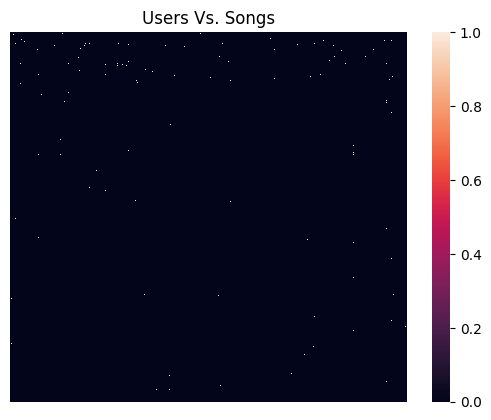

In [32]:
fig = sb.heatmap(full, yticklabels=False, xticklabels=False)
# fig = sb.clustermap(usersToTracks.notnull(), yticklabels=False, xticklabels = False)

# fig = sb.heat(usersToTracks.notnull())
# fig.set(xticklabels=[])
# fig.tick_params(x=False,y=False)
# plt.tick_params(label_bottom=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.title('Users Vs. Songs')
plt.show(fig)